In [54]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings( 'ignore' )

In [55]:
dataset = pd.read_csv( "dataset/Boston.csv" )

In [56]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,Unnamed: 15,Unnamed: 16
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,NaN,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,NaN,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,NaN,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,NaN,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0,NaN,NaN
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0,NaN,NaN
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0,NaN,NaN
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0,NaN,NaN


In [57]:
data = pd.DataFrame(dataset)

 Data Preprocessing

In [58]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,Unnamed: 15,Unnamed: 16
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,NaN,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,NaN,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,NaN,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,NaN,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,NaN,NaN


In [59]:
data.shape

(506, 17)

In [60]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CAT. MEDV', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

In [61]:
data.nunique()

CRIM           504
ZN              26
INDUS           76
CHAS             2
NOX             81
RM             446
AGE            356
DIS            412
RAD              9
TAX             66
PTRATIO         46
B              357
LSTAT          455
MEDV           229
CAT. MEDV        2
Unnamed: 15      0
Unnamed: 16      0
dtype: int64

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           506 non-null    float64
 2   INDUS        506 non-null    float64
 3   CHAS         506 non-null    int64  
 4   NOX          506 non-null    float64
 5   RM           506 non-null    float64
 6   AGE          506 non-null    float64
 7   DIS          506 non-null    float64
 8   RAD          506 non-null    int64  
 9   TAX          506 non-null    int64  
 10  PTRATIO      506 non-null    float64
 11  B            506 non-null    float64
 12  LSTAT        506 non-null    float64
 13  MEDV         506 non-null    float64
 14  CAT. MEDV    506 non-null    int64  
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
dtypes: float64(13), int64(4)
memory usage: 67.3 KB


In [63]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,Unnamed: 15,Unnamed: 16
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,0.0,0.0
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.166008,NaN,NaN
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.372456,NaN,NaN
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000,NaN,NaN
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.000000,NaN,NaN
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.000000,NaN,NaN
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,0.000000,NaN,NaN
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000,NaN,NaN


In [64]:
data.isnull().sum().sort_values( ascending = False ) 

Unnamed: 16    506
Unnamed: 15    506
TAX              0
CAT. MEDV        0
MEDV             0
LSTAT            0
B                0
PTRATIO          0
CRIM             0
ZN               0
DIS              0
AGE              0
RM               0
NOX              0
CHAS             0
INDUS            0
RAD              0
dtype: int64

In [65]:
data=data.drop(columns=['Unnamed: 15','Unnamed: 16'])

In [66]:
data.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

Feature Observation

In [67]:
corr_matrix = data.corr().round( 2 )
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39,-0.15
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36,0.37
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48,-0.37
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18,0.11
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43,-0.23
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70,0.64
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38,-0.19
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25,0.12
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38,-0.20
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47,-0.27


<AxesSubplot:>

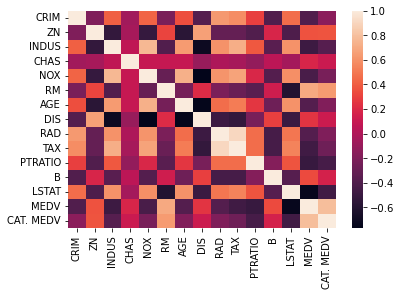

In [68]:
import seaborn as sns
sns.heatmap( data = corr_matrix )

Feature Selection

In [20]:
y = data[ 'MEDV' ]
Columns = [ 'MEDV' ]
x = data.drop( Columns , axis = 1 )
from sklearn.model_selection import train_test_split
X_Training_Dataset , X_Testing_Dataset , Y_Training_Dataset , Y_Testing_Dataset = train_test_split( x , y , test_size = 0.2 , random_state = 0 )

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
selected_features = SelectKBest( score_func = f_regression , k = 7 ).fit( X_Training_Dataset , Y_Training_Dataset )
print( 'Score List : ' , selected_features.scores_ )
print( 'Feature List : ' , X_Training_Dataset.columns )
X_Training_Dataset = selected_features.transform( X_Training_Dataset )
X_Testing_Dataset = selected_features.transform( X_Testing_Dataset )

Score List :  [ 81.77212064  81.1475855  153.00493431  13.09583263 107.63575126
 397.33191725  82.83387891  34.46704936  88.68548609 142.08609712
 187.10308463  57.67850087 535.13194094 668.0835467 ]
Feature List :  Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CAT. MEDV'],
      dtype='object')


Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
Model_1 = LinearRegression()
Model_1.fit(X_Training_Dataset , Y_Training_Dataset)

In [37]:
Prediction_1 = Model_1.predict(X_Testing_Dataset)
Prediction_1

array([23.12866336, 31.60808106, 24.17493673, 13.65063378, 21.44250196,
       20.87736833, 19.11946106, 21.22329545, 19.24830674, 20.33982086,
       14.15626068, 15.2470511 , 15.81459209,  8.38755154, 42.59472095,
       27.12144404, 20.19842372, 40.33774743, 25.32057349, 21.7112805 ,
       23.31227524, 23.50861309, 18.22140627, 24.73077088, 22.1417062 ,
       15.05654238, 18.39132525, 20.10048673, 38.86122244, 18.14037592,
       16.08585937, 17.11755677, 21.60471376, 21.67756577, 23.28721088,
       16.4768342 , 11.06538551, 31.26931338, 16.65684761, 13.17345238,
       25.46935891, 20.32519447, 21.98865584, 15.10291324, 22.84555139,
       23.64375244, 21.37330311, 21.02942389, 12.2297856 , 21.39908422,
       21.11185006, 16.55986438, 21.26212141, 39.10353851, 17.317047  ,
       20.43732502, 21.06677521, 19.60838124, 19.50971789, 18.78264075,
       21.62011691, 20.81840527, 38.27106748, 37.32783273, 17.21221088,
       26.08140568, 16.42043853, 18.76604959, 16.24104296, 21.87

In [27]:
Model_1.intercept_

31.20465252092295

In [24]:
from sklearn.metrics import r2_score
Accuracy_1 = r2_score(Y_Testing_Dataset , Prediction_1)
print('Linear Regression' , Accuracy_1)

Linear Regression 0.7213647682424642


Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor
Model_2 = RandomForestRegressor()
Model_2.fit(X_Training_Dataset , Y_Training_Dataset)
Prediction_2 = Model_2.predict(X_Testing_Dataset)

In [26]:
Accuracy_2 = r2_score(Y_Testing_Dataset , Prediction_2)
print('Random Forest' , Accuracy_2)

Random Forest 0.8680459223778121


The Accuracy of the Linear Regression model is 72 %.

The Accuracy of the Random Forest model is 86 %.